In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [416]:
# alg for tasks with boundary conditions without derivatives
def alg(y0, yn):
    df = pd.DataFrame(data=np.zeros((3, N + 1)), columns=[i for i in range(N + 1)], index=['c', 'd', 'y'])
    
    df[N]['y'] = yn
    
    df[0]['y'] = y0
    
    for i in range(1, N+1):
        x = ax + i*h

        # V1
        n = (1 - p(x)/2*h)/(1 + p(x)/2*h)
        m = -(2-q(x)*h**2)/(1+p(x)/2*h)
        df[i]['c'] = 1/(m-n*df[i-1]['c'])
        df[i]['d'] = (f(x)/(1+p(x)/2*h))*h**2 - n*df[i-1]['c']*df[i-1]['d']

        # V2; shortened expression
        # df[i]['c']=1/(-2-h**2-df[i-1]['c'])
        # df[i]['d']=i*h**3-df[i-1]['c']*df[i-1]['d']

    for i in range(N-1, -1, -1):
        df[i]['y'] = df[i]['c']*(df[i]['d']-df[i+1]['y'])
    
    return df

def plot(x: list, y: list, name=None):
    for x_, y_ in zip(x, y):
        plt.plot(x_, y_, linewidth=1)
        plt.plot(x_, y_, marker='.')
    if name != False:
        plt.title(name)
        plt.savefig(f'{name}.png')
    plt.show()

## Example from book

In [417]:
# y′′ - y = x

def f(x):
    return x  # np.exp(-2*x)*np.log(x)

def p(x):
    return 0  # 4

def q(x):
    return -1  # 4

ax = 0
bx = 1

In [418]:
N = 10
h = (bx - ax) / N

df_ex = alg(0, 0)
y_ex  = [[df_ex[i]['y']] for i in range(N+1)]
df_ex

,0,1,2,3,4,5,6,7,8,9,10
c,0.0,-0.497512,-0.661162,-0.741379,-0.788258,-0.818503,-0.839280,-0.854176,-0.865183,-0.873502,-0.879896
d,0.0,0.001000,0.002498,0.004651,0.007448,0.010871,0.014898,0.019504,0.024660,0.030335,0.036498
y,0.0,-0.014755,-0.028658,-0.040848,-0.050446,-0.056548,-0.058216,-0.054466,-0.044260,-0.026498,0.000000


In [419]:
def target_y(x):
    return 2*np.e / (np.e**2 - 1) * np.sinh(x) - x

arr = []
for i in range(N+1):
    x = ax + i*h
    arr += [[target_y(x)]]

In [420]:
pd.DataFrame(np.concatenate((y_ex, arr), axis=1), columns=['Method', 'Target'], index=[ax + i*h for i in range(0, N + 1)])

,Method,Target
0.0,0.000000,0.000000
0.1,-0.014755,-0.014766
0.2,-0.028658,-0.028680
0.3,-0.040848,-0.040878
0.4,-0.050446,-0.050483
0.5,-0.056548,-0.056591
0.6,-0.058216,-0.058260
0.7,-0.054466,-0.054507
0.8,-0.044260,-0.044295
0.9,-0.026498,-0.026518


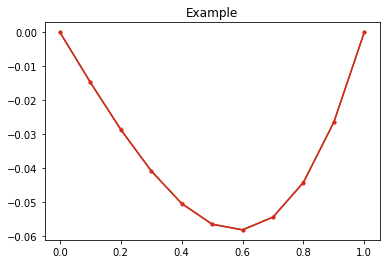

In [421]:
x = [ax + i*h for i in range(0, N + 1)]
plot([x, x], [y_ex, arr], 'Example')

## My  task (10 option)

In [422]:
# y′′ + 4y′ + 4y = e-2x ln(x); y(1) = 0, y(2) = −1

def f(x):
    return np.exp(-2*x)*np.log(x)

def p(x):
    return 4

def q(x):
    return 4

ax = 1
bx = 2

In [423]:
N = 10
h = (bx - ax) / N

df1 = alg(0, -1)
y1 = [[df1[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df2 = alg(0, -1)
y2 = [[df2[i]['y']] for i in range(N+1)]

In [424]:
df1

,0,1,2,3,4,5,6,7,8,9,10
c,0.0,-0.612245,-0.816213,-0.918112,-0.979184,-1.019842,-1.048835,-1.070538,-1.087380,-1.100821,-1.111787
d,0.0,0.000088,0.000174,0.000257,0.000328,0.000382,0.000420,0.000441,0.000449,0.000445,0.000432
y,0.0,-0.617320,-1.008201,-1.235044,-1.344942,-1.373205,-1.346106,-1.283010,-1.198031,-1.101310,-1.000000


In [425]:
df2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
c,0.0,-0.552764,-0.737012,-0.829132,-0.884400,-0.921242,-0.947555,-0.967288,-0.982633,-0.994908,...,-1.013315,-1.020393,-1.026458,-1.031713,-1.036310,-1.040365,-1.043969,-1.047192,-1.050092,-1.052715
d,0.0,0.000014,0.000030,0.000050,0.000072,0.000093,0.000115,0.000135,0.000153,0.000170,...,0.000196,0.000206,0.000214,0.000220,0.000224,0.000227,0.000227,0.000227,0.000225,0.000222
y,0.0,-0.336705,-0.609117,-0.826438,-0.996701,-1.126908,-1.223155,-1.290739,-1.334255,-1.357683,...,-1.357559,-1.339524,-1.312548,-1.278502,-1.238983,-1.195348,-1.148743,-1.100134,-1.050329,-1.000000


In [426]:
pd.DataFrame(np.concatenate((y1, y2[::2]), axis=1), columns=['First', 'Second'], index=[ax + i*h for i in range(0, N + 1, 2)])

,First,Second
1.0,0.000000,0.000000
1.1,-0.617320,-0.609117
1.2,-1.008201,-0.996701
1.3,-1.235044,-1.223155
1.4,-1.344942,-1.334255
1.5,-1.373205,-1.364462
1.6,-1.346106,-1.339524
1.7,-1.283010,-1.278502
1.8,-1.198031,-1.195348
1.9,-1.101310,-1.100134


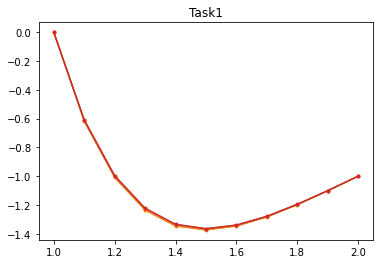

In [430]:
x = [ax + i*h for i in range(0, N + 1, 2)]
plot([x, x], [y1, y2[::2]], 'Task1')

## Addition task *

In [431]:
# y′′ + y = 1; y(0) = 0, y(π) = 0

def f(x):
    return 1

def p(x):
    return 0

def q(x):
    return 1

ax = 0
bx = np.pi

In [432]:
N = 10
h = (bx - ax) / N

df1 = alg(0, 0)
y1 = [[df1[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df2 = alg(0, 0)
y2 = [[df2[i]['y']] for i in range(N+1)]

In [433]:
df1

,0,1,2,3,4,5,6,7,8,9,10
c,0.0,-0.525955,-0.727088,-0.851632,-0.952679,-1.054157,-1.180433,-1.387211,-1.945172,22.795592,-0.040491
d,0.0,0.098696,0.150606,0.208200,0.276006,0.361641,0.479922,0.665212,1.021485,2.085660,-47.445166
y,-0.0,47.543862,90.494029,124.611489,146.528984,154.083344,146.528984,124.611489,90.494029,47.543862,0.000000


In [434]:
df2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
c,0.0,-0.506246,-0.680698,-0.772423,-0.831322,-0.874123,-0.908098,-0.937007,-0.963095,-0.987917,...,-1.038880,-1.067868,-1.101979,-1.145020,-1.204375,-1.297100,-1.474434,-1.996440,47.361400,-0.020269
d,0.0,0.024674,0.037165,0.049972,0.063274,0.077275,0.092222,0.108420,0.126265,0.146279,...,0.196017,0.228312,0.268481,0.320534,0.391692,0.496418,0.668578,1.010448,2.041973,-96.686043
y,-0.0,96.710717,191.059866,280.719477,363.477286,437.291326,500.340309,551.068564,588.224422,610.891097,...,610.891097,588.224422,551.068564,500.340309,437.291326,363.477286,280.719477,191.059866,96.710717,0.000000


In [435]:
pd.DataFrame(np.concatenate((y1, y2[::2]), axis=1), columns=['First', 'Second'], index=[ax + i*h for i in range(0, N + 1, 2)])

,First,Second
0.000000,-0.000000,-0.000000
0.314159,47.543862,191.059866
0.628319,90.494029,363.477286
0.942478,124.611489,500.340309
1.256637,146.528984,588.224422
1.570796,154.083344,618.509313
1.884956,146.528984,588.224422
2.199115,124.611489,500.340309
2.513274,90.494029,363.477286
2.827433,47.543862,191.059866


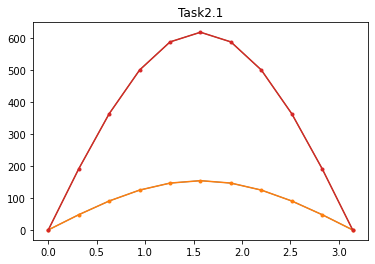

In [436]:
x = [ax + i*h for i in range(0, N + 1, 2)]
plot([x, x], [y1, y2[::2]], 'Task2.1')

### Еще сильнее уменьшим шаг и сравним результат

In [437]:
N = 10
h = (bx - ax) / N

df1 = alg(0, 0)
y1 = [[df1[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df2 = alg(0, 0)
y2 = [[df2[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df3 = alg(0, 0)
y3 = [[df3[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df4 = alg(0, 0)
y4 = [[df4[i]['y']] for i in range(N+1)]

N = 2*N
h = (bx - ax) / N

df5 = alg(0, 0)
y5 = [[df5[i]['y']] for i in range(N+1)]

In [438]:
pd.DataFrame(np.concatenate((y1, y2[::2], y3[::4], y4[::8], y5[::16]), axis=1),
             columns=['N=10', 'N=20', 'N=40', 'N=80', 'N=160'],
             index=[ax + i*h for i in range(0, N + 1, 16)])

,N=10,N=20,N=40,N=80,N=160
0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
0.314159,47.543862,191.059866,765.117563,3061.346790,12246.263204
0.628319,90.494029,363.477286,1455.399812,5823.087325,23293.836533
0.942478,124.611489,500.340309,2003.242635,8014.848737,32061.272078
1.256637,146.528984,588.224422,2354.991997,9422.058799,37690.324815
1.570796,154.083344,618.509313,2476.198653,9906.952425,39629.966285
1.884956,146.528984,588.224422,2354.991997,9422.058799,37690.324815
2.199115,124.611489,500.340309,2003.242635,8014.848737,32061.272078
2.513274,90.494029,363.477286,1455.399812,5823.087325,23293.836533
2.827433,47.543862,191.059866,765.117563,3061.346790,12246.263204


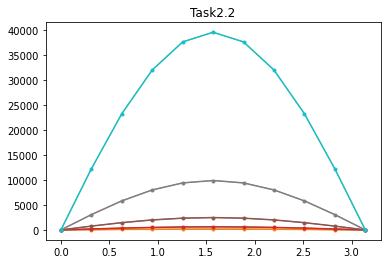

In [439]:
x = [ax + i*h for i in range(0, N + 1, 16)]
plot([x, x, x, x, x], [y1, y2[::2], y3[::4], y4[::8], y5[::16]], 'Task2.2')